In [150]:
import sys
import os

sys.path.insert(0,os.path.abspath("../src"))

from geography_analysis import GeographyAnalyzer

analyzer = GeographyAnalyzer()
biden = analyzer.load("../data/biden_clean.csv")
trump = analyzer.load("../data/trump_clean.csv")
geo_clean = analyzer.compare(biden, trump)

In [141]:
geo_clean.sort_values("Biden", ascending=False).head(20)

,user_location,Biden,Trump,diff,total
78625,united states,18099.0,21885.0,-3786.0,39984.0
79209,usa,7940.0,9976.0,-2036.0,17916.0
34265,india,6220.0,5376.0,844.0,11596.0
81821,washington dc,5174.0,7141.0,-1967.0,12315.0
43069,los angeles ca,4989.0,5112.0,-123.0,10101.0
11801,california usa,4729.0,5696.0,-967.0,10425.0
51504,new york ny,4218.0,3699.0,519.0,7917.0
25076,florida usa,3542.0,3707.0,-165.0,7249.0
51583,new york usa,3325.0,2749.0,576.0,6074.0
57321,paris,3301.0,4219.0,-918.0,7520.0


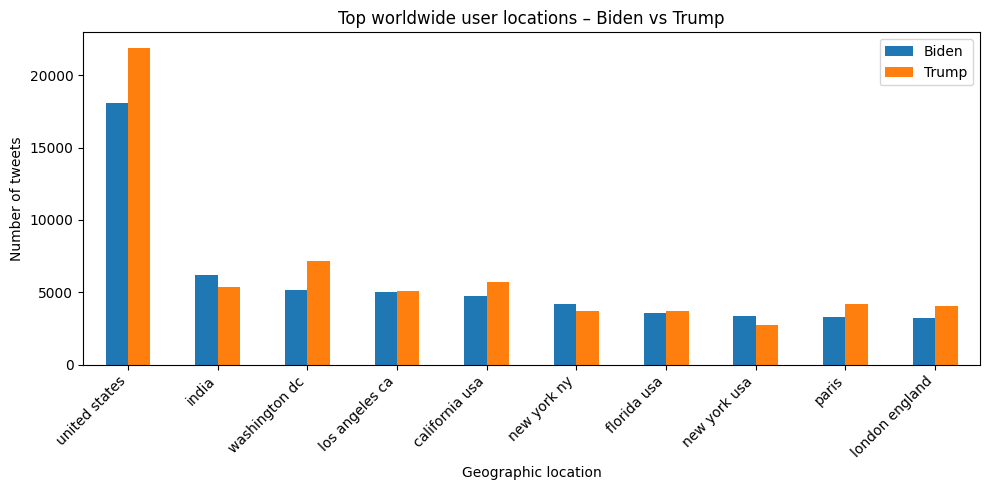

In [ ]:
import matplotlib.pyplot as plt
import os

# Créer le dossier de sortie
os.makedirs("../outputs/figures", exist_ok=True)

# user_location comme axe X
geo_clean_plot = geo_clean.set_index("user_location")

# Top 10 localisations
top10 = geo_clean_plot.sort_values("Biden", ascending=False).head(10)

# Graphe
top10[["Biden", "Trump"]].plot(
    kind="bar",
    figsize=(10,5),
    title="Top worldwide user locations – Biden vs Trump"
)

plt.ylabel("Number of tweets")
plt.xlabel("Geographic location")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.savefig("../outputs/figures/geo_barplot.png", bbox_inches="tight")
plt.show()

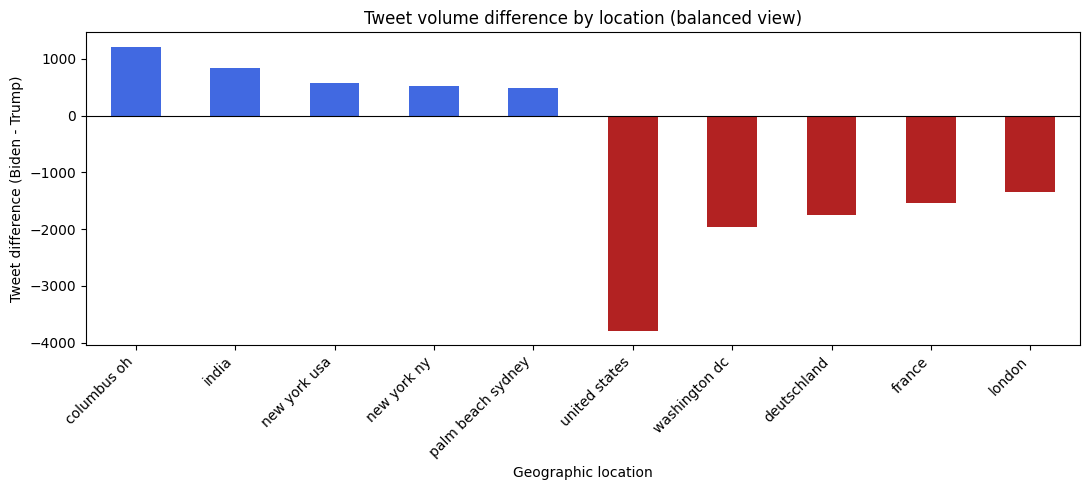

In [57]:
import matplotlib.pyplot as plt
import os

os.makedirs("../outputs/figures", exist_ok=True)

# Séparer Biden-dominant et Trump-dominant
biden_top = geo_clean[geo_clean["diff"] > 0].sort_values("diff", ascending=False).head(5)
trump_top = geo_clean[geo_clean["diff"] < 0].sort_values("diff").head(5)

# Fusionner
balanced = pd.concat([biden_top, trump_top])
balanced = balanced.set_index("user_location")

# Couleurs
colors = ["royalblue" if x > 0 else "firebrick" for x in balanced["diff"]]

# Plot
balanced["diff"].plot(
    kind="bar",
    figsize=(11,5),
    color=colors
)

plt.axhline(0, color="black", linewidth=0.8)
plt.title("Tweet volume difference by location (balanced view)")
plt.ylabel("Tweet difference (Biden - Trump)")
plt.xlabel("Geographic location")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [101]:
import pandas as pd

def extract_country(loc: str) -> str:
    if not isinstance(loc, str):
        return "Other"

    s = loc.lower()

    # United States
    if "united states" in s or " usa" in s or s.endswith(" usa") or "america" in s or "u.s." in s:
        return "United States"

    # United Kingdom
    if "united kingdom" in s or " uk" in s or "england" in s or "london" in s or "scotland" in s:
        return "United Kingdom"

    # India
    if "india" in s or "delhi" in s or "mumbai" in s:
        return "India"

    # France
    if "france" in s or "paris" in s:
        return "France"

    # Canada
    if "canada" in s or "toronto" in s:
        return "Canada"

    # Germany
    if "deutschland" in s or "germany" in s or "berlin" in s:
        return "Germany"

    # Italy
    if "italia" in s or "italy" in s or "rome" in s:
        return "Italy"

    # Australia
    if "australia" in s or "sydney" in s or "melbourne" in s:
        return "Australia"

    # Mexico
    if "mexico" in s or "mxico" in s:
        return "Mexico"

    # Turkey
    if "turkiye" in s or "turkey" in s or "istanbul" in s:
        return "Turkey"

    return "Other"


In [158]:
import os
import sys
import numpy as np

# S'assurer que src/ est dans le path
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)

# =========================
# 1) Données + métrique
# =========================
plot_df = geo_country.copy()

plot_df["rel_diff"] = (plot_df["Biden"] - plot_df["Trump"]) / (plot_df["Biden"] + plot_df["Trump"])

name_fix = {
    "United States": "United States of America",
}
plot_df["country_fixed"] = plot_df["country"].replace(name_fix)

value_by_country = dict(zip(plot_df["country_fixed"], plot_df["rel_diff"]))

# =========================
# 2) Carte en POO
# =========================
from world_map import WorldMapBuilder

builder = WorldMapBuilder(levels=22)
m = builder.build(countries_geo, value_by_country)

os.makedirs("../outputs/figures", exist_ok=True)
out_path = "../outputs/figures/world_dominance_22colors_OOP.html"
m.save(out_path)

In [161]:
import webbrowser, os
path = os.path.abspath("../outputs/figures/world_dominance_22colors_LEGEND.html")
webbrowser.open("file://" + path)

True

In [163]:
import inspect, world_map
print("world_map loaded from:", world_map.__file__)
print("WorldMapBuilder signature:", inspect.signature(world_map.WorldMapBuilder))

world_map loaded from: c:\Users\user\Documents\Projet python avancée\Analyse-de-tweet-US-election-2020-\src\world_map.py
WorldMapBuilder signature: (tiles='cartodbpositron', levels=22)
